Evaluate the performance of models built from the updated dataset (dataset_20210818).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

 # Infos for the used data
 The used cores for learning are based on the chosen cores on the "CHOSEN" sheet in data/ML station list.xlsx. The datasets (20210818) are built by buld_database_06.ipynb.

In [1]:
from nwp_cali import PrepareData
prepare = PrepareData(measurement='CaCO3%')
data_df = prepare.select_data()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860 entries, 0 to 1619
Columns: 2053 entries, 0 to mid_depth_mm
dtypes: float64(2052), object(1)
memory usage: 29.1+ MB


In [3]:
data_df

0    1    2    3    4    5    6    7    8    9  ...  2043  2044  2045  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
1615  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1616  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1617  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1618  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1619  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

      2046  2047       TC%      TOC%     CaCO3%        core  mid_depth_mm  
0      0.0   0.0  2.542079  0.394127  17.898887  SO264-64-1         115.0  
1      0.0   0.0  2.247150  0.611208  13.632300  SO264-64-1         215.0  
2      0.0   0.0  0.710588  0.523402   1.559822  SO264-64-1         305.0  
3      0.0   0.0  0.562171  0.472551   0.746802  SO264-64-1        1015.0  
4      0.0   0.0  0.578167  0.312852   2.210866  SO264-64-1        1815.0  
...    ...   ...       ...       ...        ...         ...           ...  
1615   0.0   0.0  0.197832  0.166828   0.258354  PS75-095-5       17405.0  
1616   0.0   0.0  0.217313  0.192214   0.209152  PS75-095-5       17505.0  
1617   0.0   0.0  3.293107  0.121690  26.427417  PS75-095-5       17605.0  
1618   0.0   0.0  5.383270  0.120147  43.857604  PS75-095-5       17705.0  
1619   0.0   0.0  3.830366  0.155866  30.619614  PS75-095-5       17805.0  

[1860 rows x 2053 columns]

In [6]:
from nwp_cali import PrepareData
from sklearn.model_selection import train_test_split

y_train = {}
y_dev = {} 
core_train = {} 
core_dev = {}

for measurement in ['CaCO3%', 'TOC%']:
    print(measurement)
    prepare = PrepareData(measurement=measurement)
    data_df = prepare.select_data()
    y_train[measurement], y_dev[measurement], core_train[measurement], core_dev[measurement] = train_test_split(data_df[measurement], data_df.core, test_size = 0.2, shuffle = True, random_state = 24)
    print(len(y_train[measurement]), len(y_dev[measurement]))

CaCO3%
1488 372
TOC%
1573 394


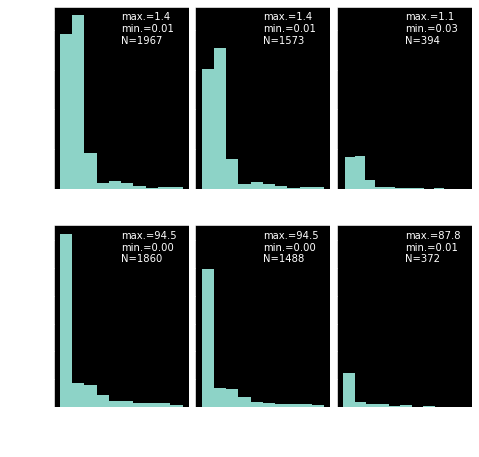

In [10]:
fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))

    #ax.set_xlabel('wt (%)\n{}'.format(label))
    
for ax, y, label in zip(axes[0, :], [y_train['TOC%'].append(y_dev['TOC%']), 
                                     y_train['TOC%'], y_dev['TOC%']], 
                                    ['Whole dataset', 'Training set', 'Dev set']):
    ax.hist(y)
    ax.text(.5, .8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    
for ax, y, label in zip(axes[1, :], [y_train['CaCO3%'].append(y_dev['CaCO3%']), 
                                     y_train['CaCO3%'], y_dev['CaCO3%']], 
                                    ['Whole dataset', 'Training set', 'Dev set']):    
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))

axes[0, 0].set_ylabel('Count for TOC')
axes[1, 0].set_ylabel('Count for Carbonate')


fig.subplots_adjust(wspace=.05, top=.92)
#fig.savefig('results/data_hist_{}.png'.format(date))

# Reduce the fitting time
The fitting time of TOC and CaCO3 are too long. It takes around 20 hours for each while it only costs the fitting on the previous dataset (ca. half of the updated dataset's size) around 3 hours. Below is finding out which parameters cause the unusual long fitting time and bad socres. Here is the mixed using of CaCO3 and TOC's fitting. According to the expereience of previous workflow, they share similar fiiting time, so I think they are comparable.


In [4]:
# slurm_2646.txt, 20.3 hours
caco3_df = pd.read_csv('results/caco3_grid_nmf+svr_20210820.csv', index_col=0)
caco3_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        62.079979      2.554236         0.015822        0.000797   
1        59.980927      2.551009         0.018551        0.005183   
2        61.050173      3.595936         0.015712        0.000797   
3        60.258785      3.982092         0.015614        0.000730   
4        61.542634      3.330765         0.016366        0.002527   
..             ...           ...              ...             ...   
247     284.354873     47.364682         0.085135        0.011363   
248     280.582034     40.841140         0.103587        0.059337   
249     311.772423     47.017473         0.088080        0.016059   
250    1080.430000    320.326421         0.080992        0.007854   
251   22054.077722  10629.864796         0.041450        0.004033   

     param_nmf__n_components  param_svr__C  param_svr__gamma  \
0                          5         100.0             0.001   
1                          5         100.0             0.010   
2                          5         100.0             0.100   
3                          5         100.0             1.000   
4                          5         100.0            10.000   
..                       ...           ...               ...   
247                       10   100000000.0             0.010   
248                       10   100000000.0             0.100   
249                       10   100000000.0             1.000   
250                       10   100000000.0            10.000   
251                       10   100000000.0           100.000   

                                                params  split0_test_score  \
0    {'nmf__n_components': 5, 'svr__C': 100.0, 'svr...           0.163017   
1    {'nmf__n_components': 5, 'svr__C': 100.0, 'svr...           0.598724   
2    {'nmf__n_components': 5, 'svr__C': 100.0, 'svr...           0.651789   
3    {'nmf__n_components': 5, 'svr__C': 100.0, 'svr...           0.713725   
4    {'nmf__n_components': 5, 'svr__C': 100.0, 'svr...           0.795973   
..                                                 ...                ...   
247  {'nmf__n_components': 10, 'svr__C': 100000000....         -21.734468   
248  {'nmf__n_components': 10, 'svr__C': 100000000....         -37.004225   
249  {'nmf__n_components': 10, 'svr__C': 100000000....         -73.285384   
250  {'nmf__n_components': 10, 'svr__C': 100000000....        -232.304440   
251  {'nmf__n_components': 10, 'svr__C': 100000000....       -1444.980248   

     split1_test_score  ...  split3_test_score  split4_test_score  \
0             0.135174  ...           0.167096           0.149840   
1             0.535591  ...           0.632675           0.576858   
2             0.617930  ...           0.682082           0.645120   
3             0.686010  ...           0.750484           0.719660   
4             0.759264  ...           0.814693           0.801049   
..                 ...  ...                ...                ...   
247         -10.663728  ...         -60.925420          -8.094469   
248         -57.132091  ...         -47.315985         -33.012532   
249         -69.618120  ...        -115.450499         -85.850475   
250        -160.547378  ...        -423.871900        -212.496397   
251       -1041.445693  ...      -36126.290691       -1330.304940   

     split5_test_score  split6_test_score  split7_test_score  \
0             0.153078           0.141901           0.174509   
1             0.629712           0.563899           0.629961   
2             0.694761           0.660216           0.680592   
3             0.748815           0.724486           0.752114   
4             0.796558           0.804961           0.824102   
..                 ...                ...                ...   
247         -18.738951          -9.445112         -12.008574   
248         -28.723207         -40.505557         -31.691258   
249         -98.985144         -63.153479         -71.363425   
250        -1

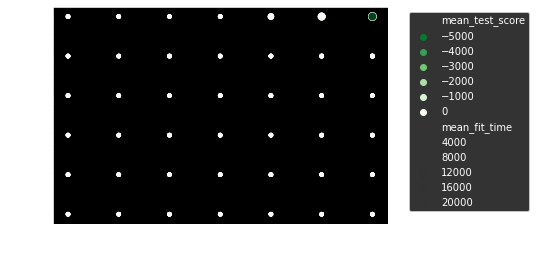

In [17]:
sns.scatterplot(data=caco3_df, x='param_svr__C', y='param_svr__gamma', size='mean_fit_time', 
                hue='mean_test_score', palette='Greens_r')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1))

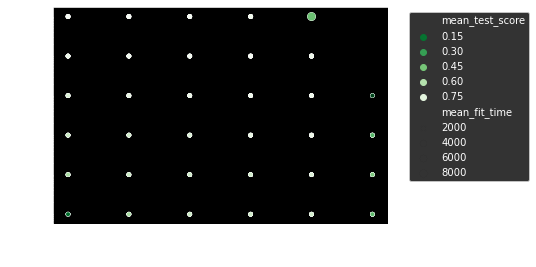

In [16]:
sns.scatterplot(data=caco3_df[caco3_df.mean_test_score > 0], x='param_svr__C', 
                y='param_svr__gamma', size='mean_fit_time', hue='mean_test_score',
                palette='Greens_r')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1))

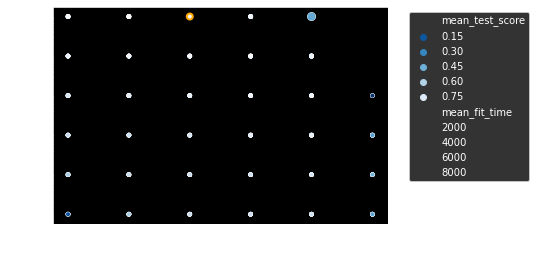

In [31]:
def plot_score_time(df):
    sns.scatterplot(data=df[df.mean_test_score > 0], x='param_svr__C', y='param_svr__gamma', 
                    size='mean_fit_time', hue='mean_test_score', palette='Blues_r')
    test_max = np.argmax(df.mean_test_score)
    plt.scatter(df.param_svr__C[test_max], df.param_svr__gamma[test_max], 
                edgecolors='orange', facecolors='none', linewidths=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1))

plot_score_time(caco3_df)

There is a overall big jump of fitting time from gamma=10 to gamma=100 while C shows a relatively gradual increase of fiitting time through its increaing in combination with gamma=100 (above first plot). This shows the gamma=100 probably need to be excluded since it influence the fitting time majorly. However, if we focus on the score by the illustration excluding extremely bad scores, we can clearly see the decrease of score in high C, including the excluded scores in C=10^8 (above second plot). We care about the score more than the fitting time so we decide to cut off >10^6 and add 10 in the param_gird of C. The fitting time is therefore not reduced mostly, but still noticebly.

P.S. This way of illustration overlaps different n_components, so only the score having longest fitting time of the n_componenets (biggest size of marker) can be displayed clearly.

In [9]:
#slurm-3130.txt, 5 hours
toc_df = pd.read_csv('results/toc_grid_nmf+svr_20210821.csv', index_col=0)
toc_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        77.520380      4.515093         0.015732        0.000432   
1        78.409784      4.476658         0.015586        0.000443   
2        78.291519      5.899994         0.017582        0.004400   
3        77.625623      4.034859         0.016156        0.000384   
4        77.164560      5.208974         0.015899        0.000523   
..             ...           ...              ...             ...   
211     206.717060     60.693490         0.101252        0.016151   
212     206.902927     65.018475         0.107087        0.016338   
213     226.425524     64.916073         0.104518        0.015583   
214     498.616189    117.383890         0.056955        0.012544   
215    6142.391855   1768.815420         0.049625        0.006137   

     param_nmf__n_components  param_svr__C  param_svr__gamma  \
0                          5          10.0             0.001   
1                          5          10.0             0.010   
2                          5          10.0             0.100   
3                          5          10.0             1.000   
4                          5          10.0            10.000   
..                       ...           ...               ...   
211                       10     1000000.0             0.010   
212                       10     1000000.0             0.100   
213                       10     1000000.0             1.000   
214                       10     1000000.0            10.000   
215                       10     1000000.0           100.000   

                                                params  split0_test_score  \
0    {'nmf__n_components': 5, 'svr__C': 10.0, 'svr_...          -0.005820   
1    {'nmf__n_components': 5, 'svr__C': 10.0, 'svr_...           0.018011   
2    {'nmf__n_components': 5, 'svr__C': 10.0, 'svr_...           0.066968   
3    {'nmf__n_components': 5, 'svr__C': 10.0, 'svr_...           0.071295   
4    {'nmf__n_components': 5, 'svr__C': 10.0, 'svr_...           0.171068   
..                                                 ...                ...   
211  {'nmf__n_components': 10, 'svr__C': 1000000.0,...           0.245696   
212  {'nmf__n_components': 10, 'svr__C': 1000000.0,...           0.357071   
213  {'nmf__n_components': 10, 'svr__C': 1000000.0,...           0.465103   
214  {'nmf__n_components': 10, 'svr__C': 1000000.0,...           0.455799   
215  {'nmf__n_components': 10, 'svr__C': 1000000.0,...          -3.687302   

     split1_test_score  ...  split3_test_score  split4_test_score  \
0            -0.002578  ...           0.004195          -0.005390   
1             0.020635  ...           0.037925           0.031235   
2             0.073391  ...           0.120352           0.107852   
3             0.095493  ...           0.155588           0.124218   
4             0.188457  ...           0.231488           0.262396   
..                 ...  ...                ...                ...   
211           0.141515  ...           0.288754           0.139142   
212           0.334394  ...           0.427228           0.344809   
213           0.494872  ...           0.415452           0.314212   
214           0.607587  ...           0.374560          -0.172243   
215          -0.983293  ...          -1.437252          -1.958991   

     split5_test_score  split6_test_score  split7_test_score  \
0             0.000632          -0.029736          -0.001005   
1             0.031250           0.009558           0.031905   
2             0.108358           0.094102           0.113312   
3             0.135547           0.110876           0.147621   
4             0.154961           0.227964           0.204881   
..                 ...                ...                ...   
211           0.173933           0.185693           0.273551   
212           0.242856           0.270297           0.382907   
213           0.251465           0.392619           0.429484   
214          

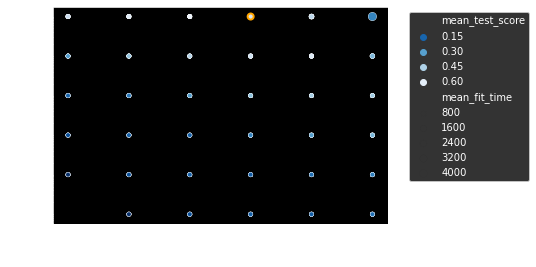

In [30]:
plot_score_time(toc_df)

Okay, the fitting time is greatly reduced. 

# Increase score
Let's try to make best score happen in the midle of the param_grid and also check n_components.

## Initial run of searching grid

### CaCO3

In [6]:
def plot_score_time(df):
    plt.figure()
    # plot the positive scores
    sns.scatterplot(data=df[df.mean_test_score > 0], x='param_svr__C', y='param_svr__gamma', 
                    size='mean_fit_time', hue='mean_test_score', palette='Blues_r')
    # plot the negative scores
    plt.scatter(x=df.loc[df.mean_test_score < 0, 'param_svr__C'], 
                y=df.loc[df.mean_test_score < 0, 'param_svr__gamma'],
                marker='X')
    # mark the best score
    test_max = np.argmax(df.mean_test_score)
    plt.scatter(df.param_svr__C[test_max], df.param_svr__gamma[test_max], 
                edgecolors='orange', facecolors='none', linewidths=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1))

In [7]:
def n_scores(df):
    scores = []
    for n in np.unique(df.param_nmf__n_components):
        data = df[df.param_nmf__n_components == n]
        max_score = data.mean_test_score.max()
        scores = np.hstack((scores, 
                            data.loc[data.mean_test_score == max_score, 'mean_test_score'].values))
    return scores

n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10


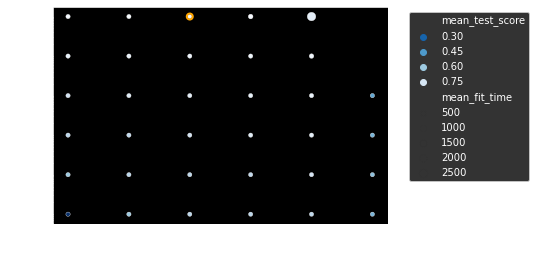

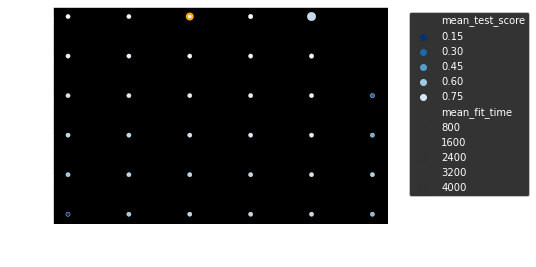

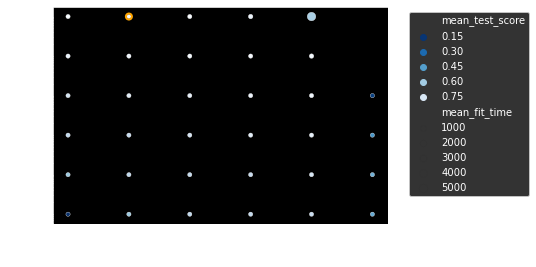

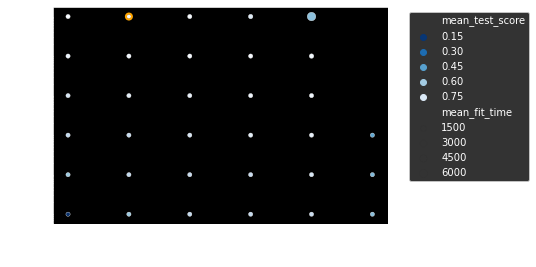

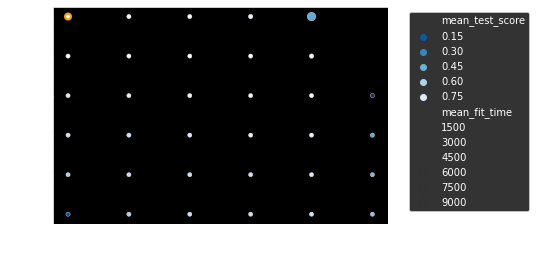

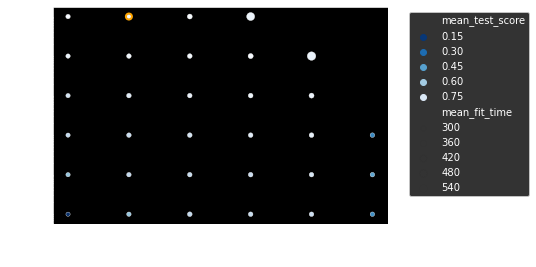

In [44]:
for n_comp in caco3_df.param_nmf__n_components.unique():
    print('n_components = {}'.format(n_comp))
    df = caco3_df[(caco3_df.param_nmf__n_components == n_comp) & 
                  (caco3_df.mean_test_score > 0)].reset_index(drop=True)
    plot_score_time(df)

Text(0, 0.5, 'Best CV score')

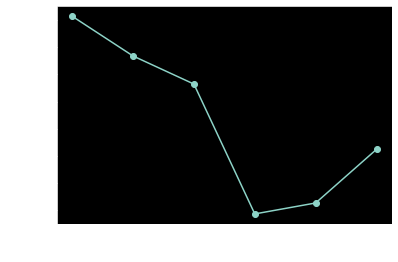

In [45]:
plt.plot(np.unique(caco3_df.param_nmf__n_components), n_scores(caco3_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
#plt.savefig('results/caco3_scores_components_{}.png'.format(date))

CaCO3:

The param_grid needs to focus on C: 1e2-1e5, n_components: 3-6 and add gamma: 1e3-1e5 and .

### TOC

n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10


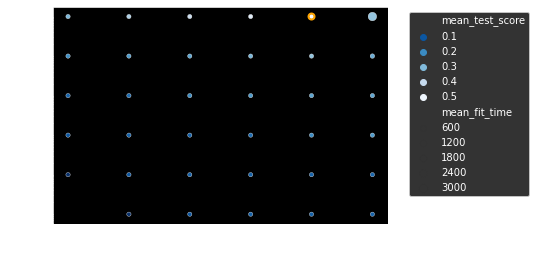

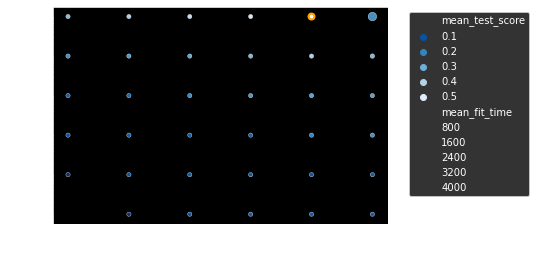

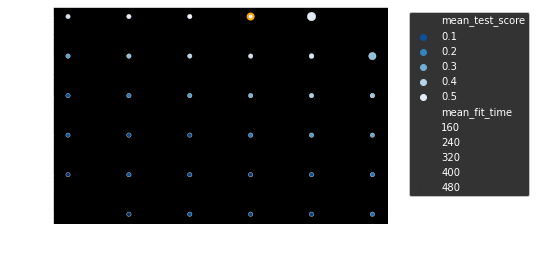

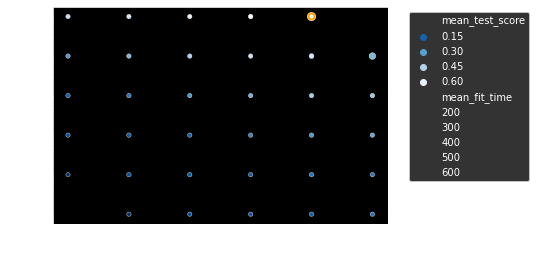

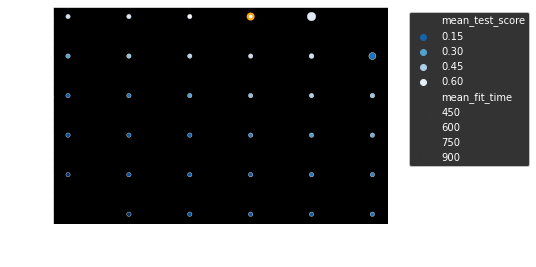

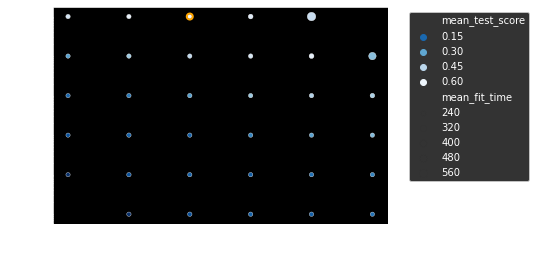

In [46]:
for n_comp in toc_df.param_nmf__n_components.unique():
    print('n_components = {}'.format(n_comp))
    df = toc_df[(toc_df.param_nmf__n_components == n_comp) & 
                  (toc_df.mean_test_score > 0)].reset_index(drop=True)
    plot_score_time(df)

Text(0, 0.5, 'Best CV score')

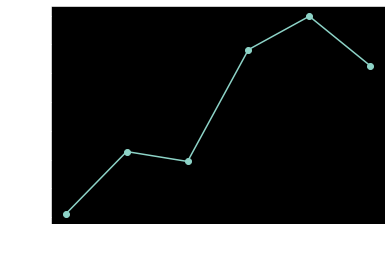

In [47]:
plt.plot(np.unique(toc_df.param_nmf__n_components), n_scores(toc_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
#plt.savefig('results/toc_scores_components_{}.png'.format(date))

TOC:

The new param_grid needs to focus on n_components: 8-10, C:1e2-1e6 and add gamma: 1e3-1e5.

## First increasing of searching grid

### CaCO3

In [27]:
caco3_df = pd.concat([pd.read_csv('results/caco3_grid_nmf+svr_20210820.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_20210823.csv', index_col=0)],
                     axis=0, join='inner').reset_index(drop=True)
caco3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            300 non-null    float64
 1   std_fit_time             300 non-null    float64
 2   mean_score_time          300 non-null    float64
 3   std_score_time           300 non-null    float64
 4   param_nmf__n_components  300 non-null    int64  
 5   param_svr__C             300 non-null    float64
 6   param_svr__gamma         300 non-null    float64
 7   params                   300 non-null    object 
 8   split0_test_score        300 non-null    float64
 9   split1_test_score        300 non-null    float64
 10  split2_test_score        300 non-null    float64
 11  split3_test_score        300 non-null    float64
 12  split4_test_score        300 non-null    float64
 13  split5_test_score        300 non-null    float64
 14  split6_test_score        3

Text(0, 0.5, 'Best CV score')

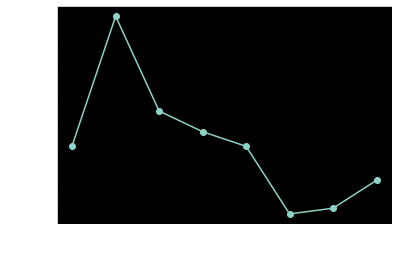

In [28]:
plt.plot(np.unique(caco3_df.param_nmf__n_components), n_scores(caco3_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
#plt.savefig('results/caco3_scores_components_{}.png'.format(date))

n_components = 3
n_components = 4
n_components = 5


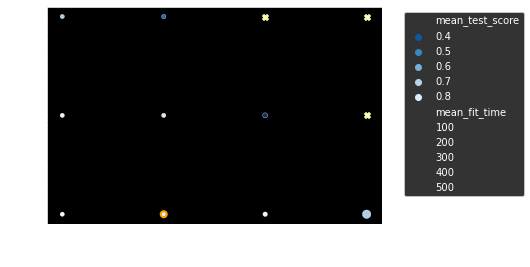

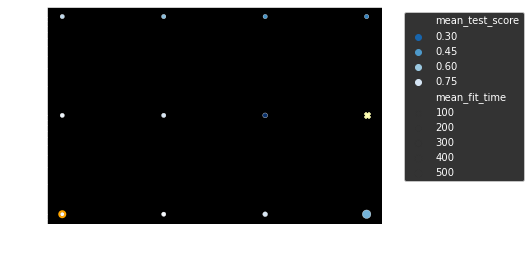

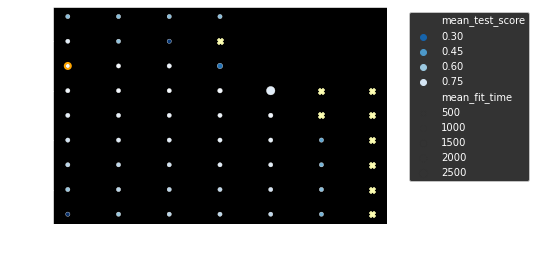

In [30]:
for n_comp in [3, 4, 5]:
    print('n_components = {}'.format(n_comp))
    df = caco3_df[caco3_df.param_nmf__n_components == n_comp].reset_index(drop=True)
    plot_score_time(df)

Focus on n_components=3-5 and add C=1-10 and gamma=2-5. Probably need to supplement the initial grid for n_components=3-5.

### TOC

In [17]:
toc_df = pd.concat([pd.read_csv('results/toc_grid_nmf+svr_20210821.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210822.csv', index_col=0)],
                   axis=0, join='inner').reset_index(drop=True)
toc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            306 non-null    float64
 1   std_fit_time             306 non-null    float64
 2   mean_score_time          306 non-null    float64
 3   std_score_time           306 non-null    float64
 4   param_nmf__n_components  306 non-null    int64  
 5   param_svr__C             306 non-null    float64
 6   param_svr__gamma         306 non-null    float64
 7   params                   306 non-null    object 
 8   split0_test_score        306 non-null    float64
 9   split1_test_score        306 non-null    float64
 10  split2_test_score        306 non-null    float64
 11  split3_test_score        306 non-null    float64
 12  split4_test_score        306 non-null    float64
 13  split5_test_score        306 non-null    float64
 14  split6_test_score        3

Text(0, 0.5, 'Best CV score')

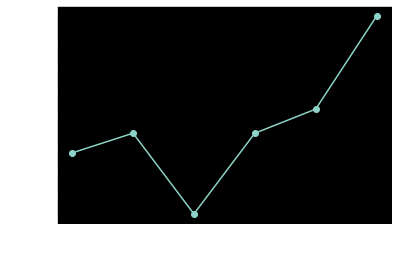

In [18]:
plt.plot(np.unique(toc_df.param_nmf__n_components), n_scores(toc_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
#plt.savefig('results/toc_scores_components_{}.png'.format(date))

n_components = 8
n_components = 9
n_components = 10


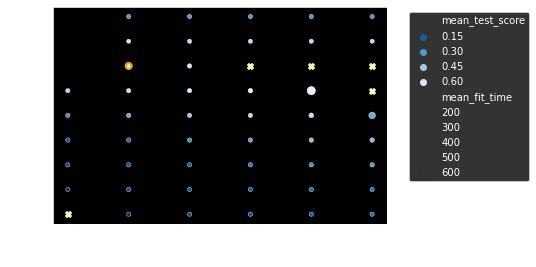

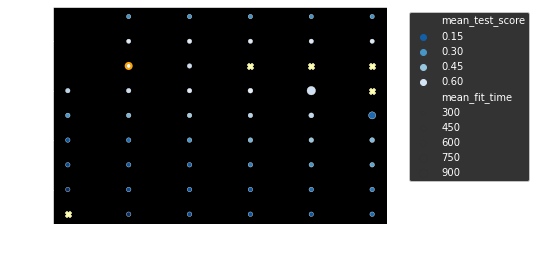

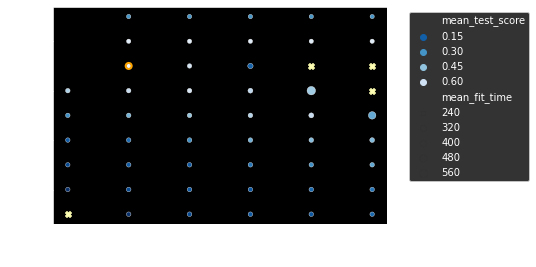

In [25]:
for n_comp in [8, 9, 10]:
    print('n_components = {}'.format(n_comp))
    df = toc_df[toc_df.param_nmf__n_components == n_comp].reset_index(drop=True)
    plot_score_time(df)

TOC:

Keep concentrate on n_components=8-10 and gamma=1e3-1e5, then add C=0.1-10. Probably we need to increase n_components to 12.

## Second increasing of searching grid

### CaCO3

In [39]:
caco3_df = pd.concat([pd.read_csv('results/caco3_grid_nmf+svr_20210820.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_1_20210823.csv', index_col=0)],
                     axis=0, join='inner').reset_index(drop=True)
caco3_df.shape

(324, 21)

Text(0, 0.5, 'Best CV score')

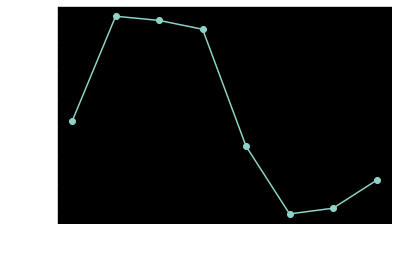

In [40]:
plt.plot(np.unique(caco3_df.param_nmf__n_components), n_scores(caco3_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
#plt.savefig('results/caco3_scores_components_{}.png'.format(date))

n_components = 3
n_components = 4
n_components = 5


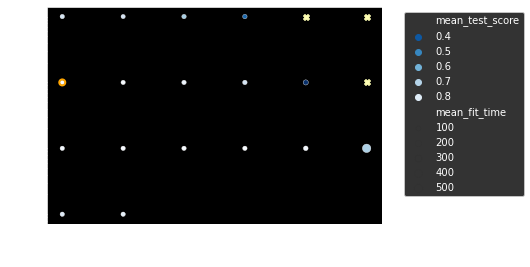

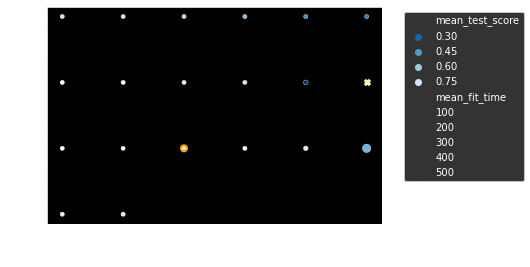

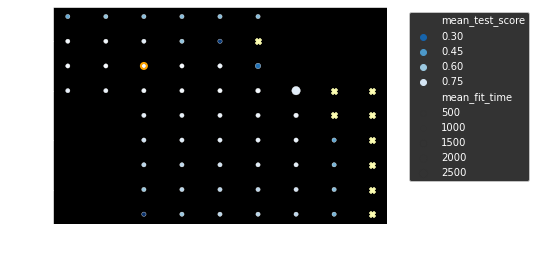

In [41]:
for n_comp in [3, 4, 5]:
    print('n_components = {}'.format(n_comp))
    df = caco3_df[caco3_df.param_nmf__n_components == n_comp].reset_index(drop=True)
    plot_score_time(df)

Finally, we got a peak along n_components. However, the best score is not yet locating in the middle of the grid each of n_components=3&4. I need to design separete grids for these to n_components. <br>
n_components=3: C=1e(-2)-1e(-1), gamma=1e2-1e5; <br>
n_components=4: C=1-1e4, gamma=1-1e2

### TOC

In [2]:
toc_df = pd.concat([pd.read_csv('results/toc_grid_nmf+svr_20210821.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210822.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210823.csv', index_col=0)],
                   axis=0, join='inner').reset_index(drop=True)
toc_df.shape

(333, 21)

In [9]:
toc_df.mean_test_score.max()

0.7488736193825629

Text(0, 0.5, 'Best CV score')

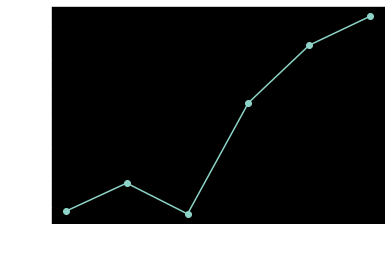

In [37]:
plt.plot(np.unique(toc_df.param_nmf__n_components), n_scores(toc_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
#plt.savefig('results/toc_scores_components_{}.png'.format(date))

n_components = 8
n_components = 9
n_components = 10


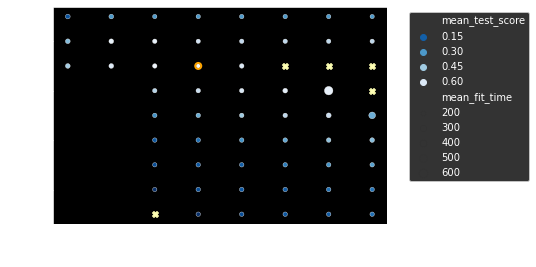

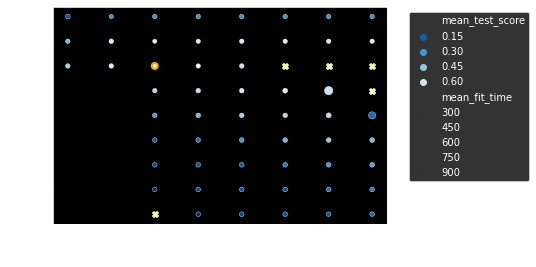

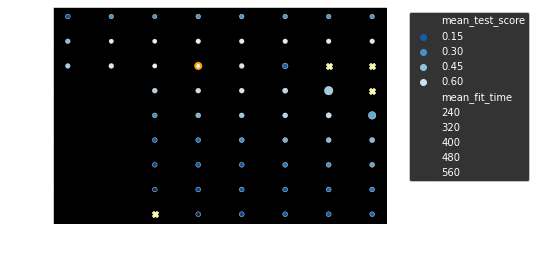

In [38]:
for n_comp in [8, 9, 10]:
    print('n_components = {}'.format(n_comp))
    df = toc_df[toc_df.param_nmf__n_components == n_comp].reset_index(drop=True)
    plot_score_time(df)

Since the best score is now locating in the middle of the grid whthin each n_components (8-10) but it's not yet reach the peak along n_componenets, I'll try out n_components=11-13 using the grids giving better scores of the previous attempts.

## Third increasing of searching grid

### CaCO3

In [4]:
caco3_df = pd.concat([pd.read_csv('results/caco3_grid_nmf+svr_20210820.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_1_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_2-1_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_2-2_20210823.csv', index_col=0)],
                     axis=0, join='inner').reset_index(drop=True)
caco3_df.shape

(349, 21)

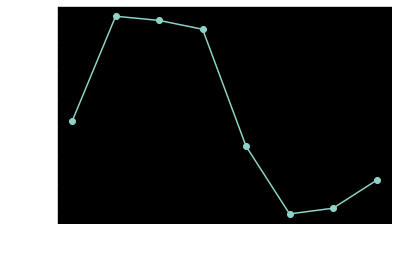

In [5]:
plt.plot(np.unique(caco3_df.param_nmf__n_components), n_scores(caco3_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
plt.savefig('results/caco3_scores_components_{}.png'.format(date))

n_components = 3
n_components = 4


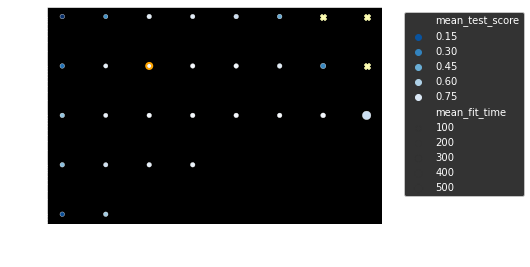

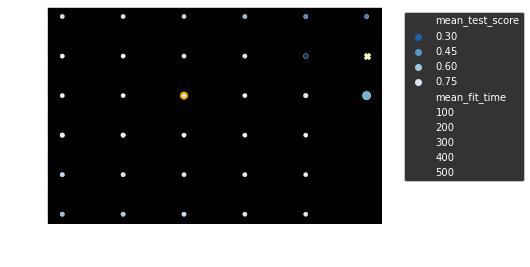

In [50]:
for n_comp in [3, 4]:
    print('n_components = {}'.format(n_comp))
    df = caco3_df[caco3_df.param_nmf__n_components == n_comp].reset_index(drop=True)
    plot_score_time(df)

In [7]:
caco3_df.iloc[caco3_df.mean_test_score.argmax(), :]

mean_fit_time                                                      14.641434
std_fit_time                                                        3.568932
mean_score_time                                                     0.011293
std_score_time                                                      0.000298
param_nmf__n_components                                                    4
param_svr__C                                                           100.0
param_svr__gamma                                                      1000.0
params                     {'nmf__n_components': 4, 'svr__C': 100.0, 'svr...
split0_test_score                                                   0.896521
split1_test_score                                                   0.804046
split2_test_score                                                   0.876364
split3_test_score                                                   0.870702
split4_test_score                                                   0.901908

Yes, they all reach to the middle of the grid. Accompany with the peak of n_components, I select n_components=4, C=1e2, gamma=1e3 as the optimal parameters for CaCO3, which gives 0.874 CV scores (slurm-4057.txt).

### TOC

In [4]:
toc_df = pd.concat([pd.read_csv('results/toc_grid_nmf+svr_20210821.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210822.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210823.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_2_20210823.csv', index_col=0)],
                   axis=0, join='inner').reset_index(drop=True)
toc_df.shape

(408, 21)

Text(0, 0.5, 'Best CV score')

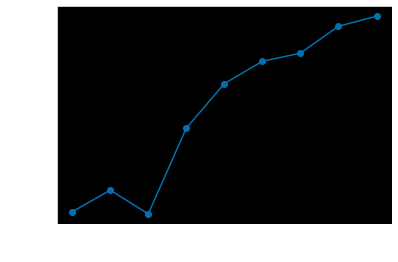

In [8]:
plt.plot(np.unique(toc_df.param_nmf__n_components), n_scores(toc_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
#plt.savefig('results/toc_scores_components_{}.png'.format(date))

n_components = 11
n_components = 12
n_components = 13


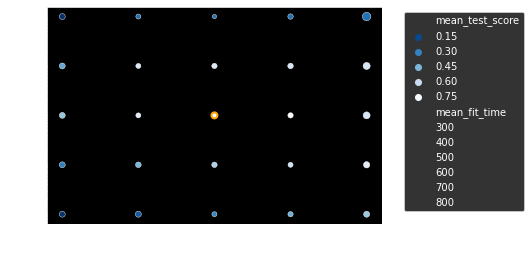

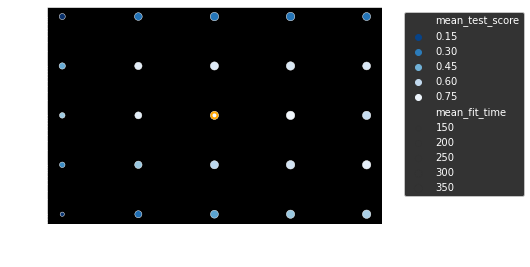

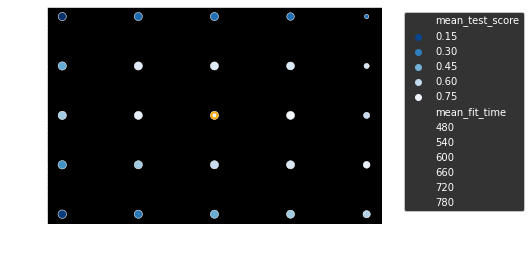

In [9]:
for n_comp in [11, 12, 13]:
    print('n_components = {}'.format(n_comp))
    df = toc_df[toc_df.param_nmf__n_components == n_comp].reset_index(drop=True)
    plot_score_time(df)

In [11]:
toc_df.iloc[toc_df.mean_test_score.argmax(), :]

mean_fit_time                                                     749.448097
std_fit_time                                                      290.259596
mean_score_time                                                     0.306719
std_score_time                                                      0.151282
param_nmf__n_components                                                   13
param_svr__C                                                            10.0
param_svr__gamma                                                      1000.0
params                     {'nmf__n_components': 13, 'svr__C': 10.0, 'svr...
split0_test_score                                                   0.850676
split1_test_score                                                   0.782505
split2_test_score                                                   0.830579
split3_test_score                                                   0.755606
split4_test_score                                                   0.708889

These three additive grids all have the best score in the middle, so no need to extend their grids. From the view of n_components, the score has not yet reach the peak. But since the fitting time has increased noticebly (ca. 50 times of the optimal CaCO3 model's fitting time) and the max_iter of NMF is unsufficient, I would stop here and use n_components=13, C=10, gamma=1e3 as the optimal parameters, which gives 0.788 CV score (slurm-4078.txt).